<a href="https://colab.research.google.com/github/ernestojr-7/Analise-de-Dados-Financeiros/blob/main/Risco_de_acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risco de ações

## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
0,2015-01-02,14.990000,15.20,5.923076,0.232812,11.910702,47.259998,16.020000,9.37,37.820000,9.000000,22.650000
1,2015-01-05,14.850000,15.00,5.963461,0.237187,11.544731,46.320000,15.730000,9.62,37.070000,8.270000,22.180000
2,2015-01-06,15.210000,14.80,5.875000,0.234062,10.822770,46.580002,16.330000,9.55,36.150002,8.060000,22.490000
3,2015-01-07,14.550000,14.67,5.807692,0.241875,10.746248,48.150002,16.559999,9.69,37.389999,8.450000,23.480000
4,2015-01-08,14.270000,14.15,5.905769,0.240000,10.995774,48.509998,16.540001,9.66,38.910000,9.020000,23.559999
...,...,...,...,...,...,...,...,...,...,...,...,...
1746,2022-01-13,16.750000,11.95,29.100000,6.090000,25.219999,101.550003,14.990000,12.04,47.040001,33.849998,29.650000
1747,2022-01-14,16.930000,11.71,30.700001,6.330000,25.200001,103.070000,15.100000,12.08,46.880001,34.560001,30.410000
1748,2022-01-17,16.770000,11.58,30.350000,6.120000,25.290001,102.580002,14.800000,12.14,47.509998,34.450001,30.469999
1749,2022-01-18,16.379999,11.09,30.540001,5.890000,24.170000,102.849998,14.580000,12.03,47.610001,34.570000,30.740000


In [3]:
dataset.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
count,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000
mean,15.770080,30.580180,14.995472,7.080503,16.340971,78.563314,17.789132,13.349954,41.393758,20.459092,32.147516
std,9.763646,15.613666,11.920619,8.064344,8.863451,23.611611,2.403025,2.152520,5.152255,7.610218,10.082926
min,1.160000,6.106568,4.942307,0.030585,7.156402,36.450001,11.030000,9.000000,28.980000,5.910000,12.700000
25%,7.705000,17.839999,6.538461,0.319726,9.981036,57.344999,16.490000,11.610000,37.365000,14.000000,25.559999
50%,14.550000,24.000000,9.005000,3.797812,11.368400,76.849998,18.160000,13.140000,41.619999,20.490000,30.900000
75%,22.235000,44.504999,20.337500,11.821250,22.636666,98.739998,19.170000,15.030000,44.645000,28.110001,37.275000
max,43.790001,64.800003,46.105000,27.450001,40.599998,125.750000,24.270000,18.430000,56.740002,34.570000,55.180000


## Cálculos com todas as ações - risco médio anual

In [4]:
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
0,14.990000,15.20,5.923076,0.232812,11.910702,47.259998,16.020000,9.37,37.820000,9.000000,22.650000
1,14.850000,15.00,5.963461,0.237187,11.544731,46.320000,15.730000,9.62,37.070000,8.270000,22.180000
2,15.210000,14.80,5.875000,0.234062,10.822770,46.580002,16.330000,9.55,36.150002,8.060000,22.490000
3,14.550000,14.67,5.807692,0.241875,10.746248,48.150002,16.559999,9.69,37.389999,8.450000,23.480000
4,14.270000,14.15,5.905769,0.240000,10.995774,48.509998,16.540001,9.66,38.910000,9.020000,23.559999
...,...,...,...,...,...,...,...,...,...,...,...
1746,16.750000,11.95,29.100000,6.090000,25.219999,101.550003,14.990000,12.04,47.040001,33.849998,29.650000
1747,16.930000,11.71,30.700001,6.330000,25.200001,103.070000,15.100000,12.08,46.880001,34.560001,30.410000
1748,16.770000,11.58,30.350000,6.120000,25.290001,102.580002,14.800000,12.14,47.509998,34.450001,30.469999
1749,16.379999,11.09,30.540001,5.890000,24.170000,102.849998,14.580000,12.03,47.610001,34.570000,30.740000


In [5]:
taxas_retorno = (dataset / dataset.shift(1)) - 1
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890,-0.018102,0.026681,-0.019831,-0.081111,-0.020751
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613,0.038144,-0.007276,-0.024818,-0.025393,0.013977
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705,0.014084,0.014660,0.034301,0.048387,0.044020
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477,-0.001208,-0.003096,0.040653,0.067456,0.003407
...,...,...,...,...,...,...,...,...,...,...,...
1746,0.002994,0.001676,-0.037062,-0.034865,-0.003556,-0.003533,0.007392,-0.030596,0.007496,0.024206,0.016107
1747,0.010746,-0.020084,0.054983,0.039409,-0.000793,0.014968,0.007338,0.003322,-0.003401,0.020975,0.025632
1748,-0.009451,-0.011102,-0.011401,-0.033175,0.003571,-0.004754,-0.019868,0.004967,0.013439,-0.003183,0.001973
1749,-0.023256,-0.042314,0.006260,-0.037582,-0.044286,0.002632,-0.014865,-0.009061,0.002105,0.003483,0.008861


In [6]:
taxas_retorno.std() * 100

GOL           4.902753
CVC           3.522646
WEGE          2.205222
MGLU          4.104449
TOTS          2.433190
BOVA          1.669537
AMBEV         1.759158
ODONTOPREV    1.991016
VIVO          1.937979
PETROBRAS     3.271848
BBRASIL       2.848059
dtype: float64

In [7]:
# Anualizar
taxas_retorno.std() * math.sqrt(246)

GOL           0.768967
CVC           0.552505
WEGE          0.345876
MGLU          0.643758
TOTS          0.381631
BOVA          0.261857
AMBEV         0.275913
ODONTOPREV    0.312279
VIVO          0.303960
PETROBRAS     0.513169
BBRASIL       0.446701
dtype: float64

## Correlação entre ações

In [8]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890,-0.018102,0.026681,-0.019831,-0.081111,-0.020751
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613,0.038144,-0.007276,-0.024818,-0.025393,0.013977
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705,0.014084,0.014660,0.034301,0.048387,0.044020
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477,-0.001208,-0.003096,0.040653,0.067456,0.003407
...,...,...,...,...,...,...,...,...,...,...,...
1746,0.002994,0.001676,-0.037062,-0.034865,-0.003556,-0.003533,0.007392,-0.030596,0.007496,0.024206,0.016107
1747,0.010746,-0.020084,0.054983,0.039409,-0.000793,0.014968,0.007338,0.003322,-0.003401,0.020975,0.025632
1748,-0.009451,-0.011102,-0.011401,-0.033175,0.003571,-0.004754,-0.019868,0.004967,0.013439,-0.003183,0.001973
1749,-0.023256,-0.042314,0.006260,-0.037582,-0.044286,0.002632,-0.014865,-0.009061,0.002105,0.003483,0.008861


In [9]:
taxas_retorno.cov()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
GOL,0.002404,0.000886,0.000337,0.000638,0.000368,0.000481,0.000311,0.000219,0.000217,0.000696,0.000717
CVC,0.000886,0.001241,0.000235,0.000463,0.000266,0.000327,0.000251,0.000184,0.000162,0.000472,0.000476
WEGE,0.000337,0.000235,0.000486,0.000268,0.000212,0.000194,0.000148,0.000110,0.000102,0.000244,0.000216
MGLU,0.000638,0.000463,0.000268,0.001685,0.000303,0.000309,0.000174,0.000172,0.000165,0.000394,0.000431
TOTS,0.000368,0.000266,0.000212,0.000303,0.000592,0.000195,0.000129,0.000127,0.000106,0.000245,0.000237
BOVA,0.000481,0.000327,0.000194,0.000309,0.000195,0.000279,0.000168,0.000123,0.000141,0.000414,0.000375
AMBEV,0.000311,0.000251,0.000148,0.000174,0.000129,0.000168,0.000309,0.000072,0.000107,0.000217,0.000206
ODONTOPREV,0.000219,0.000184,0.000110,0.000172,0.000127,0.000123,0.000072,0.000396,0.000085,0.000163,0.000155
VIVO,0.000217,0.000162,0.000102,0.000165,0.000106,0.000141,0.000107,0.000085,0.000376,0.000208,0.000196
PETROBRAS,0.000696,0.000472,0.000244,0.000394,0.000245,0.000414,0.000217,0.000163,0.000208,0.001070,0.000580


Empresas [Bova](http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraQuadrimestre.aspx?Indice=IBOV&idioma=pt-br)

In [10]:
taxas_retorno.corr()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
GOL,1.000000,0.513198,0.312047,0.316871,0.308736,0.587102,0.361043,0.223917,0.228051,0.433651,0.513396
CVC,0.513198,1.000000,0.302662,0.320150,0.309888,0.556329,0.405730,0.261961,0.237580,0.409594,0.473957
WEGE,0.312047,0.302662,1.000000,0.296308,0.394882,0.525936,0.380371,0.250230,0.238274,0.338727,0.344553
MGLU,0.316871,0.320150,0.296308,1.000000,0.303076,0.451602,0.240628,0.209930,0.207369,0.293063,0.369050
TOTS,0.308736,0.309888,0.394882,0.303076,1.000000,0.481048,0.300790,0.262794,0.225299,0.307682,0.342182
BOVA,0.587102,0.556329,0.525936,0.451602,0.481048,1.000000,0.572222,0.370374,0.435924,0.757745,0.788264
AMBEV,0.361043,0.405730,0.380371,0.240628,0.300790,0.572222,1.000000,0.206294,0.314989,0.376736,0.411087
ODONTOPREV,0.223917,0.261961,0.250230,0.209930,0.262794,0.370374,0.206294,1.000000,0.220377,0.250714,0.273249
VIVO,0.228051,0.237580,0.238274,0.207369,0.225299,0.435924,0.314989,0.220377,1.000000,0.328649,0.354816
PETROBRAS,0.433651,0.409594,0.338727,0.293063,0.307682,0.757745,0.376736,0.250714,0.328649,1.000000,0.621959


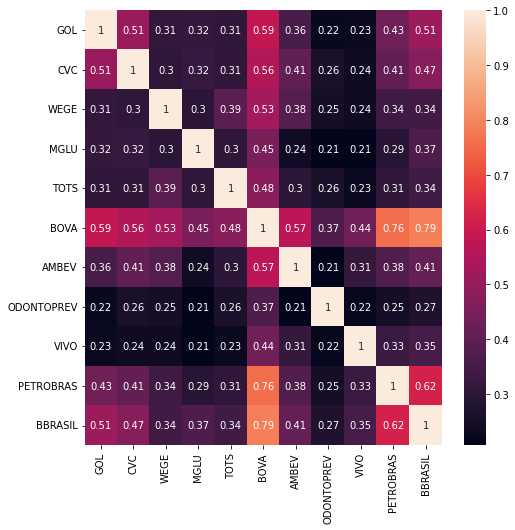

In [11]:
# melhor visualizacao da correlacao entre as acoes
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

## Risco de um portfólio

### Somente duas ações

In [12]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890,-0.018102,0.026681,-0.019831,-0.081111,-0.020751
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613,0.038144,-0.007276,-0.024818,-0.025393,0.013977
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705,0.014084,0.014660,0.034301,0.048387,0.044020
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477,-0.001208,-0.003096,0.040653,0.067456,0.003407
...,...,...,...,...,...,...,...,...,...,...,...
1746,0.002994,0.001676,-0.037062,-0.034865,-0.003556,-0.003533,0.007392,-0.030596,0.007496,0.024206,0.016107
1747,0.010746,-0.020084,0.054983,0.039409,-0.000793,0.014968,0.007338,0.003322,-0.003401,0.020975,0.025632
1748,-0.009451,-0.011102,-0.011401,-0.033175,0.003571,-0.004754,-0.019868,0.004967,0.013439,-0.003183,0.001973
1749,-0.023256,-0.042314,0.006260,-0.037582,-0.044286,0.002632,-0.014865,-0.009061,0.002105,0.003483,0.008861


In [13]:
taxas_retorno_gol_cvc = taxas_retorno.drop(columns = ['WEGE', 'MGLU', 'TOTS', 'BOVA', 'AMBEV',	'ODONTOPREV',	'VIVO',	'PETROBRAS',	'BBRASIL'])
taxas_retorno_gol_cvc

,GOL,CVC
0,NaN,NaN
1,-0.009340,-0.013158
2,0.024242,-0.013333
3,-0.043392,-0.008784
4,-0.019244,-0.035447
...,...,...
1746,0.002994,0.001676
1747,0.010746,-0.020084
1748,-0.009451,-0.011102
1749,-0.023256,-0.042314


In [14]:
taxas_retorno_gol_cvc.cov()

,GOL,CVC
GOL,0.002404,0.000886
CVC,0.000886,0.001241


In [15]:
taxas_retorno_gol_cvc.cov() * 246

,GOL,CVC
GOL,0.591310,0.218036
CVC,0.218036,0.305262


In [16]:
pesos = np.array([0.5, 0.5])

In [17]:
np.dot(taxas_retorno_gol_cvc.cov() * 246, pesos)

array([0.40467308, 0.26164921])

In [18]:
np.dot(pesos, np.dot(taxas_retorno_gol_cvc.cov() * 246, pesos))

0.3331611434972598

In [19]:
math.sqrt(np.dot(pesos, np.dot(taxas_retorno_gol_cvc.cov() * 246, pesos))) * 100

57.720112915452596

### Todas as ações

In [20]:
dataset.columns

Index(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA', 'AMBEV', 'ODONTOPREV',
       'VIVO', 'PETROBRAS', 'BBRASIL'],
      dtype='object')

In [21]:
pesos1 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1])

In [22]:
len(taxas_retorno.columns) -1

10

In [23]:
pesos1.sum()

1.0

In [24]:
taxas_retorno.cov() * 246

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
GOL,0.591310,0.218036,0.082994,0.156860,0.090602,0.118218,0.076602,0.053770,0.053304,0.171123,0.176350
CVC,0.218036,0.305262,0.057838,0.113871,0.065341,0.080488,0.061851,0.045198,0.039899,0.116132,0.116975
WEGE,0.082994,0.057838,0.119630,0.065976,0.052123,0.047634,0.036299,0.027027,0.025050,0.060122,0.053234
MGLU,0.156860,0.113871,0.065976,0.414424,0.074459,0.076128,0.042741,0.042203,0.040577,0.096815,0.106127
TOTS,0.090602,0.065341,0.052123,0.074459,0.145642,0.048072,0.031672,0.031318,0.026135,0.060257,0.058333
BOVA,0.118218,0.080488,0.047634,0.076128,0.048072,0.068569,0.041343,0.030286,0.034697,0.101823,0.092204
AMBEV,0.076602,0.061851,0.036299,0.042741,0.031672,0.041343,0.076128,0.017775,0.026417,0.053342,0.050667
ODONTOPREV,0.053770,0.045198,0.027027,0.042203,0.031318,0.030286,0.017775,0.097518,0.020918,0.040177,0.038117
VIVO,0.053304,0.039899,0.025050,0.040577,0.026135,0.034697,0.026417,0.020918,0.092392,0.051264,0.048177
PETROBRAS,0.171123,0.116132,0.060122,0.096815,0.060257,0.101823,0.053342,0.040177,0.051264,0.263343,0.142574


In [25]:
np.dot(taxas_retorno.cov() * 246, pesos1)

array([0.16709513, 0.11404022, 0.05802943, 0.11540526, 0.06358832,
       0.06708942, 0.04734935, 0.04140208, 0.04241324, 0.1055148 ,
       0.09900945])

In [26]:
variancia_portfolio1 = np.dot(pesos1, np.dot(taxas_retorno.cov() * 246, pesos1))
variancia_portfolio1

0.0853847283179994

In [27]:
volatilidade_portfolio1 = math.sqrt(variancia_portfolio1)
volatilidade_portfolio1

0.2922066534458095

In [28]:
pesos2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [29]:
variancia_portfolio2 = np.dot(pesos2, np.dot(taxas_retorno.cov() * 246, pesos2))
variancia_portfolio2

0.06856892084856611

In [30]:
volatilidade_portfolio2 = math.sqrt(variancia_portfolio2)
volatilidade_portfolio2

0.2618566799769792

## Risco sistemático e não sistemático

- Risco sistemático: mudança diária no preço das ações, devido a eventos como recessão da economia, comportamento do cliente (eventos externos). Não pode ser eliminado e pode afetar todas as empresas (ex: Pandemia)
- Risco não sistemático: Eventos específicos na empresa (depende do tipo de empresa)

In [31]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890,-0.018102,0.026681,-0.019831,-0.081111,-0.020751
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613,0.038144,-0.007276,-0.024818,-0.025393,0.013977
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705,0.014084,0.014660,0.034301,0.048387,0.044020
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477,-0.001208,-0.003096,0.040653,0.067456,0.003407
...,...,...,...,...,...,...,...,...,...,...,...
1746,0.002994,0.001676,-0.037062,-0.034865,-0.003556,-0.003533,0.007392,-0.030596,0.007496,0.024206,0.016107
1747,0.010746,-0.020084,0.054983,0.039409,-0.000793,0.014968,0.007338,0.003322,-0.003401,0.020975,0.025632
1748,-0.009451,-0.011102,-0.011401,-0.033175,0.003571,-0.004754,-0.019868,0.004967,0.013439,-0.003183,0.001973
1749,-0.023256,-0.042314,0.006260,-0.037582,-0.044286,0.002632,-0.014865,-0.009061,0.002105,0.003483,0.008861


In [32]:
pesos1

array([0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1])

In [33]:
pesos2

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [34]:
taxas_retorno.var() * 246

GOL           0.591310
CVC           0.305262
WEGE          0.119630
MGLU          0.414424
TOTS          0.145642
BOVA          0.068569
AMBEV         0.076128
ODONTOPREV    0.097518
VIVO          0.092392
PETROBRAS     0.263343
BBRASIL       0.199541
dtype: float64

In [35]:
variancia_pesos1 = (taxas_retorno.var() * 246) * pesos1
variancia_pesos1

GOL           0.059131
CVC           0.030526
WEGE          0.011963
MGLU          0.041442
TOTS          0.014564
BOVA          0.000000
AMBEV         0.007613
ODONTOPREV    0.009752
VIVO          0.009239
PETROBRAS     0.026334
BBRASIL       0.019954
dtype: float64

In [36]:
sub1 = - variancia_pesos1[0] - variancia_pesos1[1] - variancia_pesos1[2] - variancia_pesos1[3] - variancia_pesos1[4] - variancia_pesos1[5]
sub1

-0.1576268256372613

In [37]:
variancia_portfolio1

0.0853847283179994

In [38]:
risco_nao_sistematico1 = (variancia_portfolio1 - sub1)
risco_nao_sistematico1

0.2430115539552607

In [39]:
variancia_pesos2 = (taxas_retorno.var() * 246) * pesos2
variancia_pesos2

GOL           0.000000
CVC           0.000000
WEGE          0.000000
MGLU          0.000000
TOTS          0.000000
BOVA          0.068569
AMBEV         0.000000
ODONTOPREV    0.000000
VIVO          0.000000
PETROBRAS     0.000000
BBRASIL       0.000000
dtype: float64

In [40]:
sub2 = variancia_pesos2[0] - variancia_pesos2[1] - variancia_pesos2[2] - variancia_pesos2[3] - variancia_pesos2[4] - variancia_pesos2[5]
sub2

-0.06856892084856614

In [41]:
variancia_portfolio2

0.06856892084856611

In [42]:
risco_nao_sistematico2 = (variancia_portfolio2 - sub2)
risco_nao_sistematico2

0.13713784169713225